<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных,-расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Анализ-данных,-расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных, расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

«Мегалайн» — федеральный оператор сотовой связи, предлагающий клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»

- Ежемесячная плата: 550 рублей

- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

- Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля

- сообщение: 3 рубля

- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

- Ежемесячная плата: 1950 рублей

- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

- Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль

- сообщение: 1 рубль

- 1 Гб интернет-трафика: 150 рублей

## Изучение данных из файла

In [1]:
from scipy import stats as st
import math as mt
import numpy as np
import pandas as pd

# создадим датафреймы
try:
    calls = pd.read_csv('datasets/calls.csv')
    internet = pd.read_csv('datasets/internet.csv')
    messages = pd.read_csv('datasets/messages.csv')
    tariffs = pd.read_csv('datasets/tariffs.csv')
    users = pd.read_csv('datasets/users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

# изучим общую информацию
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица **calls** (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [2]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица **internet** (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [3]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица **messages** (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [4]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица **tariffs** (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица **users** (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

### Вывод

Итак, изучили общую информацию по всем имеющимся данным. Всего имеется 5 таблиц: **calls, internet, messages, tariffs, users**, в которых находится основная информация о 500 пользователях, в том числе и об их звонках, использовании интернет трафика, сообщениях, тарифе.

Предварительно можно сказать, что данных вполне достаточно, чтобы верно проанализировать поведение клиентов и сделать необходимый вывод о том, какой тариф лучше.

## Предобработка данных

### Изменение типов данных

Начнем подготовку данных с того, что приведем данные к нужным типам.

Начнем с таблицы **calls**. 

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Как видно, столбцы *id* и *call_date* имеют тип *object*, что необходимо поменять. Также можно заменить тип *int64* на *int32*, чтобы данные занимали меньше места.

In [7]:
calls['id'] = calls['id'].astype('int32')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['user_id'] = calls['user_id'].astype('int32')
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int32')
# проверим данные о таблице после изменений
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 3.9 MB


Продолжим с таблицей **internet**.

In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet['id'] = internet['id'].astype('int32')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['user_id'] = internet['user_id'].astype('int32')
# удалим ненужный столбец
internet.drop(['Unnamed: 0'], axis=1, inplace=True)
# проверим данные о таблице после изменений
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int32         
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 3.4 MB


Изменим типы данных в таблице **messages**

In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
messages['id'] = messages['id'].astype('int32')
messages['user_id'] = messages['user_id'].astype('int32')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
# проверим данные о таблице после изменений
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int32         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 1.9 MB


Изменим типы данных в таблице **tariffs**

In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
tariffs['tariff_name'] = tariffs['tariff_name'].astype('string')
tariffs['messages_included'] = tariffs['messages_included'].astype('int32')
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('int32')
tariffs['minutes_included'] = tariffs['minutes_included'].astype('int32')
tariffs['rub_monthly_fee'] = tariffs['rub_monthly_fee'].astype('int32')
tariffs['rub_per_gb'] = tariffs['rub_per_gb'].astype('int32')
tariffs['rub_per_message'] = tariffs['rub_per_message'].astype('int32')
tariffs['rub_per_minute'] = tariffs['rub_per_minute'].astype('int32')
# проверим данные о таблице после изменений
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int32 
 1   mb_per_month_included  2 non-null      int32 
 2   minutes_included       2 non-null      int32 
 3   rub_monthly_fee        2 non-null      int32 
 4   rub_per_gb             2 non-null      int32 
 5   rub_per_message        2 non-null      int32 
 6   rub_per_minute         2 non-null      int32 
 7   tariff_name            2 non-null      string
dtypes: int32(7), string(1)
memory usage: 200.0 bytes


Изменим типы данных в таблице **users**

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
users['user_id'] = users['user_id'].astype('int32')
users['age'] = users['age'].astype('int32')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['city'] = users['city'].astype('string')
users['first_name'] = users['first_name'].astype('string')
users['last_name'] = users['last_name'].astype('string')
users['tariff'] = users['tariff'].astype('string')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int32         
 1   age         500 non-null    int32         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    string        
 4   first_name  500 non-null    string        
 5   last_name   500 non-null    string        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    string        
dtypes: datetime64[ns](2), int32(2), string(4)
memory usage: 27.5 KB


В столбце *churn_date* есть пропуски, но их заполнять не нужно, так как они обозначают, что тариф еще действует на момент выгрузки данных.

### Вывод

Итак, изменили тип данных столбцов в таблицах. Теперь даты имеют нужный тип *datetime*, строки имеют строчный тип *string*, а числовые данные имеют тип *int*. 

Также был удален ошибочно появившийся столбец *Unnamed: 0* в таблице **internet**. Вероятно, этот безымянный столбец с индексами появился после считывания данных из csv файла. 

### Расчёты и добавление результатов в таблицу

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя

И добавим результаты в таблицу.

Начнем с количества сделанных звонков и израсходованных минут разговора по месяцам. Для этого для начала необходимо создать новый столбец в таблицах **calls, messages, internet** с месяцем, когда был совершен звонок.

In [16]:
# новый столбец с месяцем в каждой из трех таблиц
calls['date_month'] = calls['call_date'].dt.month
messages['date_month'] = messages['message_date'].dt.month
internet['date_month'] = internet['session_date'].dt.month

# изменим цифровое значение на словесное для удобства восприятия
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
for index in range(0, 12):
    calls['date_month'] = calls['date_month'].replace(index+1, months[index])
    messages['date_month'] = messages['date_month'].replace(index+1, months[index])
    internet['date_month'] = internet['date_month'].replace(index+1, months[index])

# изменим тип данных на строчный 
calls['date_month'] = calls['date_month'].astype('string')
messages['date_month'] = messages['date_month'].astype('string')
internet['date_month'] = internet['date_month'].astype('string')

In [17]:
# сводная таблица с длительностью звонков и их количеством в месяц
calls_pivot = calls.pivot_table(index = ['user_id', 'date_month'], values = 'duration', aggfunc = ['sum', 'count']).reset_index()
# меняем названия столбцов
calls_pivot.set_axis(['user_id','date_month','calls_duration_sum', 'calls_count'],axis = 'columns',inplace = True)
calls_pivot.head()

,user_id,date_month,calls_duration_sum,calls_count
0,1000,август,408,52
1,1000,декабрь,333,46
2,1000,июль,340,47
3,1000,июнь,172,43
4,1000,май,159,22


In [18]:
# столбцы из таблицы users, которые понадобятся для исследования
users_nedeed = users[['user_id', 'tariff', 'city']]
users_nedeed.set_axis(['user_id','tariff_name','city'],axis = 'columns',inplace = True)

In [19]:
# объединяем столбцы в одну основную таблицу
general_data = users_nedeed.merge(tariffs, on='tariff_name', how='outer')
general_data = general_data.merge(calls_pivot, on=['user_id'], how='left')
general_data.head()

,user_id,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,date_month,calls_duration_sum,calls_count
0,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,август,408.0,52.0
1,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,декабрь,333.0,46.0
2,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,июль,340.0,47.0
3,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,июнь,172.0,43.0
4,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,май,159.0,22.0


Теперь посчитаем и добавим в общую таблицу количество отправленных сообщений по месяцам.

In [20]:
messages_pivot = messages.pivot_table(index=['user_id', 'date_month'], values='id', aggfunc='count').reset_index()
messages_pivot.set_axis(['user_id', 'date_month', 'messages_count'], axis='columns', inplace=True)
general_data = general_data.merge(messages_pivot, on=['user_id', 'date_month'], how='left')
general_data.head()

,user_id,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,date_month,calls_duration_sum,calls_count,messages_count
0,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,август,408.0,52.0,81.0
1,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,декабрь,333.0,46.0,70.0
2,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,июль,340.0,47.0,75.0
3,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,июнь,172.0,43.0,60.0
4,1000,ultra,Краснодар,1000,30720,3000,1950,150,1,1,май,159.0,22.0,22.0


Далее найдем объем израсходованного интернет-трафика по месяцам у каждого пользователя.

In [21]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int32         
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int32         
 4   date_month    149396 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(2), string(1)
memory usage: 4.6 MB


In [22]:
internet_pivot = internet.pivot_table(index=['user_id', 'date_month'], values='mb_used', aggfunc='sum').reset_index()
# посчитаем количество потраченных за месяц гигабайтов
internet_pivot['gb_used'] = internet_pivot['mb_used'] / 1024
# округлим в большую сторону, так как общая сумма за месяц округляется в бо́льшую сторону 
internet_pivot['gb_used'] = np.ceil(internet_pivot['gb_used'])
# соединяем таблицы
general_data = general_data.merge(internet_pivot, on=['user_id', 'date_month'], how='left')

In [23]:
# добавим столбец с включенным в тариф количеством интернет трафика
general_data['gb_included'] = general_data['mb_per_month_included'] / 1024
general_data['gb_included'] = np.ceil(general_data['gb_included'])

Теперь можно посчитать помесячную выручку с каждого пользователя. Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [43]:
# создадим функцию для подсчета выручки
def month_revenue(row):
    payment = row['rub_monthly_fee']
    gb = row['gb_used']
    minutes = row['calls_duration_sum']
    messages = row['messages_count']
    if gb > row['gb_included']:
        payment += (gb - row['gb_included']) * row['rub_per_gb']
    if minutes > row['minutes_included']:
        payment += (minutes - row['minutes_included']) * row['rub_per_minute']
    if messages > row['messages_included']:
        payment += (messages - row['messages_included']) * row['rub_per_message']
    return payment
# применим функцию к датафрейму
general_data['revenue'] = general_data.apply(month_revenue, axis=1)
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 3181
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3182 non-null   int32  
 1   tariff_name            3182 non-null   string 
 2   city                   3182 non-null   string 
 3   messages_included      3182 non-null   int32  
 4   mb_per_month_included  3182 non-null   int32  
 5   minutes_included       3182 non-null   int32  
 6   rub_monthly_fee        3182 non-null   int32  
 7   rub_per_gb             3182 non-null   int32  
 8   rub_per_message        3182 non-null   int32  
 9   rub_per_minute         3182 non-null   int32  
 10  date_month             3174 non-null   object 
 11  calls_duration_sum     3174 non-null   float64
 12  calls_count            3174 non-null   float64
 13  messages_count         2678 non-null   float64
 14  mb_used                3163 non-null   float64
 15  gb_u

In [46]:
general_data['messages_count'].isna().sum()

504

### Вывод

Итак, была создана общая таблица с необходимыми данными для исследования. С помощью метода *merge* объединили таблицы с данными по пользователям, их звонкам, сообщениям, использованному интернет-трафику. А также в таблицу добавили данные по тарифу.

Произвели расчеты для каждого пользователя, нашли и добавили в общую таблицу:
- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя

Выручка была найдена с помощью функции, которая на вход принимала строку общей таблицы и возвращала доход от пользователя за месяц.

## Анализ обработанных данных

Далее проанализируем имеющущюся информацию. Например, поведение клиентов оператора, исходя из выборки, то есть найдем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Посчитаем среднее количество, дисперсию и стандартное отклонение. 

In [25]:
# сгруппируем общую таблицу (чтобы было удобнее сравнивать) так, чтобы получить средние значения и медиану столбцов 
# с количеством минут, гб, сообщений и выручки в месяц для каждого тарифа
general_data.groupby('tariff_name')[['calls_duration_sum', 'messages_count', 'gb_used', 'revenue']].agg(['mean', 'median']).reset_index()

tariff_name calls_duration_sum        messages_count           gb_used  \
                            mean median           mean median       mean   
0       smart         419.062978  423.0      38.747390   34.0  16.337084   
1       ultra         545.451104  528.0      61.195538   52.0  19.695005   

              revenue          
  median         mean  median  
0   17.0  1290.225169  1023.0  
1   19.0  2070.219436  1950.0

Итак, по этим данным можно сказать, что в среднем пользователи тарифа "ультра" тратят больше и минут, и сообщений, и гб (около 530-540 минут, 50-60 сообщений, 19-20 гб), в то время как пользователи тарифа "смарт" в среднем тратят меньше (около 420 минут, 34-38 сообщений, 16-17 гб), но в итоге часто выходят за лимиты и переплачивают за дополнительные минуты, сообщения и интернет-трафик. Пользователи тарифа "ультра" в среднем платят как раз стандартную абонентскую плату за тариф, в то время как пользователи тарифа "смарт" переплачивают почти в два раза больше абонентской платы.

В целом, большой разницы между медианными и средними значениями не видно, различия колеблются в пределах нескольких процентов. Но в данных по сообщениям по обоим тарифам видно некоторую скошенность вправо, так как средние значения больше медиан. Также и в данных с выручкой видно скошенность вправо, то есть высокие значения выручки и количества сообщений влияют на среднее.

Найдем дисперсию и стандартное отклонение для данных по минутам, трафику и сообщениям в месяц в зависимости от тарифа.

Для этого выделим две отдельные таблицы с данными по тарифам.

In [26]:
ultra = general_data[['calls_duration_sum', 'messages_count', 'gb_used', 'revenue']][general_data['tariff_name'] == 'ultra']
smart = general_data[['calls_duration_sum', 'messages_count', 'gb_used', 'revenue']][general_data['tariff_name'] == 'smart']

Начнем с тарифа "ультра."

In [27]:
# дисперсии данных тарифа "ультра"
np.var(ultra)

calls_duration_sum     94104.361174
messages_count          1996.949954
gb_used                   94.677435
revenue               143000.265328
dtype: float64

In [28]:
# стандартные отклонения данных тарифа "ультра"
np.std(ultra)

calls_duration_sum    306.764341
messages_count         44.687246
gb_used                 9.730233
revenue               378.153759
dtype: float64

Далее найдем эти параметры для тарифа "смарт".

In [29]:
# дисперсии данных тарифа "смарт"
np.var(smart)

calls_duration_sum     35828.065310
messages_count           718.797357
gb_used                   32.972333
revenue               670545.638737
dtype: float64

In [30]:
# стандартные отклонения данных тарифа "смарт"
np.std(smart)

calls_duration_sum    189.283030
messages_count         26.810396
gb_used                 5.742154
revenue               818.868511
dtype: float64

Для большинства распределений верно правило трёх стандартных отклонений, или правило трёх сигм. Оно гласит — практически все значения (около 99%) находятся в промежутке до 3 стандартных отклонений в положительную и в отрицательную сторону от среднего значения. То есть теперь легко посчитать, в каких примерно пределах находятся данные.

Далее построим гистограммы для столбцов с минутами, сообщениями и гб интернет-трафика.

Начнем с тарифа "ультра".

<AxesSubplot:>

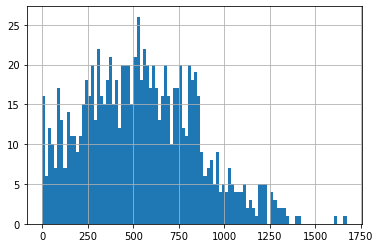

In [31]:
ultra['calls_duration_sum'].hist(bins=100)

На данной гистограмме видно нормальное распределение с обрывом слева, так как количество минут не может быть менее 0. Также значений 0 довольно много, так как это означает, что звонок был пропущен. Наибольший пик видно около 500-550, что соответствует среднему и медиане. Также можно увидеть, что пользователи тарифа "ультра" обычно не тратят и половины минут, имеющихся в тарифе (3000 минут), значения более 1500 уже крайне редки.

<AxesSubplot:>

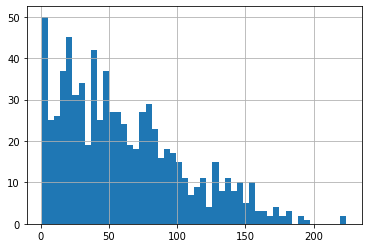

In [32]:
ultra['messages_count'].hist(bins=50)

Гистограмма имеет обрыв слева (количество сообщений не может быть меньше 0) и скошенность вправо (влияют высокие значения). 
На гистограмме с количеством сообщений тарифа "ультра" также видно, что пользователи тратят гораздо меньше, чем им доступно. В среднем, около 50 сообщений, что соответствует медиане и среднему, и что всего лишь 5% от всех доступных в тарифе (1000 сообщений). И значений 0, и около того, довольно много. Получается, что пользователи в принципе мало используют сообщения.

<AxesSubplot:>

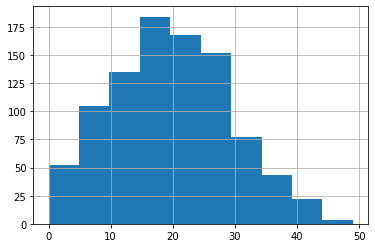

In [33]:
ultra['gb_used'].hist()

На гистограмме с количеством потраченных за месяц гб интернет-трафика видно нормальное распределение. В среднем пользователи тратят около 20гб, что соответствует медиане и среднему. Также можно увидеть, что доступных 30гб трафика часто не хватает и клиенты тратят больше (от 30 до 50гб). Значит, переплаты в тарифе ультра бывают именно из-за превышения лимита доступного интернет-трафика.

Далее рассмотрим тариф "смарт".

<AxesSubplot:>

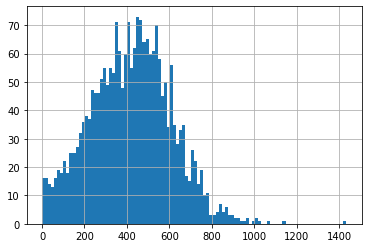

In [34]:
smart['calls_duration_sum'].hist(bins=100)

Гистограмма имеет нормальное распределение и небольшую скошенность влево (влияют малые значения). По данной гистограмме количества минут, потраченных за месяц, пользователем с тарифом "смарт", видно, что в среднем они тратят около 400-450 сообщений, что соответствует медиане и среднему. 

Также можно заметить, что довольно много пользователей превышает лимит по тарифу и использует за месяц в итоге больше 500 минут. Следовательно, немалый процент переплат в этом тарифе дают потраченные минут разговора.

<AxesSubplot:>

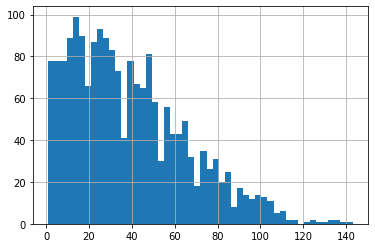

In [35]:
smart['messages_count'].hist(bins=50)

Гистограмма имеет обрыв слева (количество сообщений не может быть меньше 0) и скошенность вправо (влияют высокие значения). В среднем пользователи тратят около 35-40 сообщений, что соответствует медиане и среднему. 

На гистограмме с количеством сообщений тарифа "смарт" также видно, что пользователи часто тратят больше, чем им доступно (50 сообщений), что приводит к переплате. Но также небольших и даже нулевых значений много, получается, что некоторые пользователи не используют сообщения.

<AxesSubplot:>

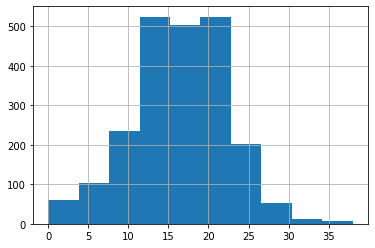

In [36]:
smart['gb_used'].hist()

Данная гистограмма имеет нормальное распределение, но также имеет плато примерно от 12 до 22 гб. В среднем это 17 гб интернет-трафика, что соответствует медиане и среднему. Сразу заметно, что пользователи тарифа "смарт" в среднем выходят за рамки доступных по тарифу 15гб и сильно переплачивают. Некоторые даже превышают лимит в 2 и более раза (более 30гб).

### Вывод

Итак, проанализировали данные, изучили поведение клиентов, узнали, сколько в среднем минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Данные, которые были получены (использование минут, сообщений, интернет-трафика в среднем за месяц):

Тариф "ультра":
- количество минут 530-540
- количество сообщений 50-60
- количество гб интернет-трафика 19-20

Тариф "смарт":
- количество минут 420
- количество сообщений 34-38
- количество гб интернет-трафика 16-17

Выяснилось, что количество включенных в тарифы гб интернет-трафика часто не хватает пользователям обоих тарифов, но особенно клиентам с тарифом "смарт", которые даже в среднем тратят больше доступного лимита.

Количества сообщений хватает всем пользователям тарифа "ультра" и большинству тарифа "смарт".

Количества доступных минут хватает пользователям тарифа "ультра", но часто не хватает пользователям тарифа "смарт", хотя в среднем клиенты укладываются в лимит.

В итоге получается, что клиенты с тарифом "ультра" очень редко платят сверх своей абонентской платы, в то время как пользователи тарифа "смарт" регулярно переплачивают.

## Проверка гипотез

Далее проверим гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### Гипотеза о различии выручки пользователей тарифов «Ультра» и «Смарт» 

Начнем с проверки первой гипотезы про различие средней выручки у пользователей разных тарифов. Таблицы с данными по разным тарифам у нас уже имеются.

Нулевая гипотеза всегда должна означать равенство. Таким образом, нулевая гипотеза будет гласить: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.

Альтернативная же гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различна (двустороняя гипотеза). 

In [38]:
# критический уровень статистической значимости
alpha = .05
# проверка гипотезы о равенстве средних значений выручки тарифов
results = st.ttest_ind(ultra['revenue'], smart['revenue'],  equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.796424815525196e-246
Отвергаем нулевую гипотезу


Итак, проверка показала, что нулевая гипотеза отвергнута. Следовательно, вероятность того, что выручка у пользователей разных тарифов разная, выше. Значит, выручка действительно зависит от тарифа.

### Гипотеза о различии средней выручки пользователей из Москвы и пользователей из других регионов

Далее проверим вторую гипотезу про различие средней выручки у пользователей разных регионов.

Нулевая гипотеза будет гласить: средняя выручка пользователей из Москвы и других регионов одинакова.

Альтернативная же гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов (двустороняя гипотеза). 

In [39]:
moscow = general_data['revenue'][general_data['city'] == 'Москва']
other = general_data['revenue'][general_data['city'] != 'Москва']

In [40]:
# критический уровень статистической значимости
alpha = .05
# проверка гипотезы о равенстве средних значений выручки пользователей разных регионов
results = st.ttest_ind(moscow, other, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4452390325541491
Не получилось отвергнуть нулевую гипотезу


Таким образом, не удалось отвергнуть нулевую гипотезу.  44% - это явно слишком большая вероятность, чтобы делать вывод о значимом различии между выручкой. А значит, нельзя точно сказать, действительно ли равны или различны данные по выручке пользователей из разных регионов. 

### Вывод

Итак, были сформулированы и проверены две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Результаты получили следующие:
- выручка действительно зависит от тарифа
- нет оснований полагать, что выручка зависит от региона проживания клиента

Нулевая гипотеза была сформулирована в обоих случаях на основании равенства, то есть она противоположна изначально заданной. Альтернативная же гипотеза как раз соответствует необходимой для исследования гипотезе о различии совокупностей данных о выручке.

Рассматривали гипотезу о равенстве средних двух независимых генеральных совокупностей, так как наши выборки (какой тариф и какой регион проживания у клиента) не зависимы друг от друга. 

Использовался t-test (ttest_ind).

## Общий вывод

Подводя итог, произведен предварительный анализ тарифов и поведения клиентов на небольшой выборке (500 пользователей «Мегалайна»).

1. Вначале подготовили данные:
- привели данные к нужным типам (тип object заменен на необходимый, датам изменили тип на datetime)
- найдена и исправлена ошибка в данных (безымянный столбец в таблице internet удален)

2. Посчитали для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя 

 Была создана общая таблица с необходимыми данными для исследования. С помощью метода *merge* объединили таблицы с данными по пользователям, их звонкам, сообщениям, использованному интернет-трафику. А также в таблицу добавили данные по тарифу.

 Выручка была найдена с помощью функции, которая на вход принимала строку общей таблицы и возвращала доход от пользователя за месяц.

3. Проанализировали данные, изучили поведение клиентов, узнали, сколько в среднем минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

 Данные, которые были получены (использование минут, сообщений, интернет-трафика в среднем за месяц):

 Тариф "ультра":

- количество минут 530-540
- количество сообщений 50-60
- количество гб интернет-трафика 19-20

 Тариф "смарт":

- количество минут 420
- количество сообщений 34-38
- количество гб интернет-трафика 16-17

 Выяснилось, что количество включенных в тарифы гб интернет-трафика часто не хватает пользователям обоих тарифов, но особенно клиентам с тарифом "смарт", которые даже в среднем тратят больше доступного лимита.

 Количества сообщений хватает всем пользователям тарифа "ультра" и большинству тарифа "смарт".

 Количества доступных минут хватает пользователям тарифа "ультра", но часто не хватает пользователям тарифа "смарт", хотя в среднем клиенты укладываются в лимит.

 В итоге получается, что клиенты с тарифом "ультра" очень редко платят сверх своей абонентской платы, в то время как пользователи тарифа "смарт" регулярно переплачивают.

4. Проверили гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

 Результаты получили следующие:

- выручка действительно зависит от тарифа
- нет оснований полагать, что выручка зависит от региона проживания клиента